### Intensity Normalization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import torchio as tio
import radio as rio
from radio.data.datautils import get_subjects_dataset, compute_histogram, get_intensity_normalization_transform

#### SubjectsDataset

In [4]:
dir_collection = {
    'hcp': "/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies/HCP/radio_3T_MPR",
    'rflab': "/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies/RFLab/radio_7T_MPR",
}

In [5]:
train_dataset, test_dataset, val_dataset = get_subjects_dataset(dir_collection)

In [6]:
print(f'Train Dataset size: {len(train_dataset)} subjects')
print(f'Test Dataset size: {len(test_dataset)} subjects')
print(f'Validation Dataset size: {len(val_dataset)} subjects')

Train Dataset size: 1320 subjects
Test Dataset size: 404 subjects
Validation Dataset size: 330 subjects


Subject(Keys: ('mri',); images: 1)
ScalarImage(shape: (1, 256, 320, 320); spacing: (0.70, 0.70, 0.70); orientation: RAS+; dtype: torch.FloatTensor; memory: 100.0 MiB)


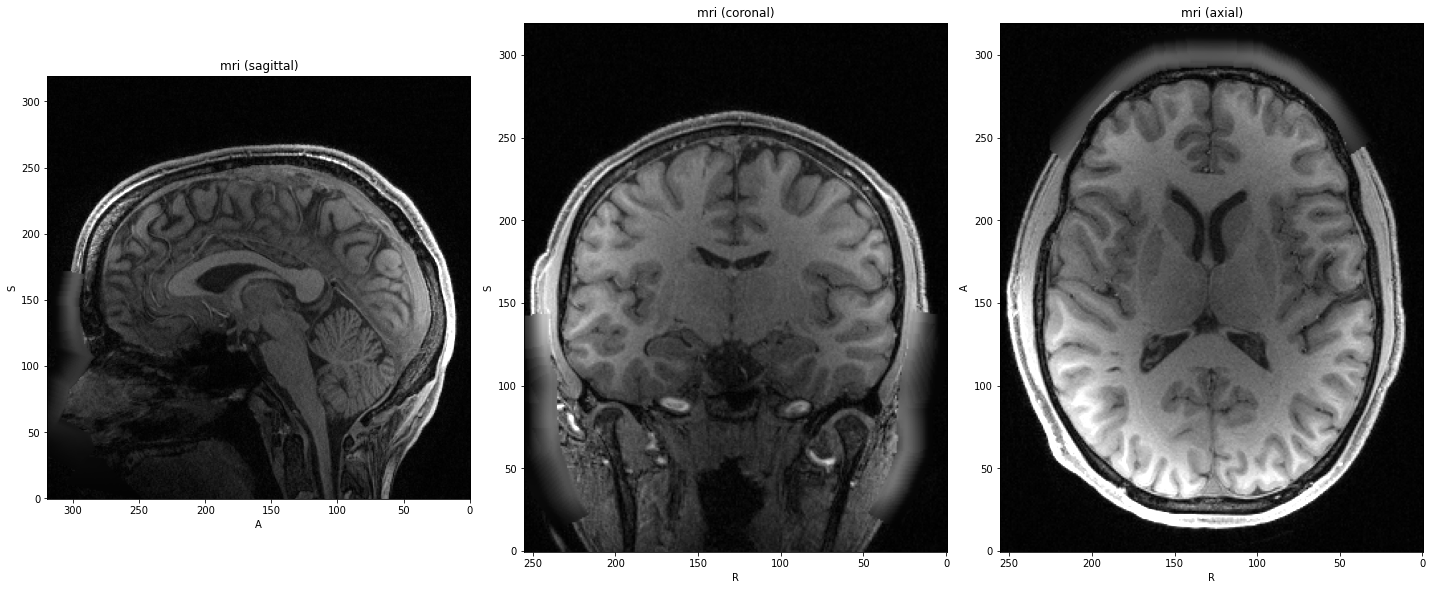

In [7]:
a_subject = val_dataset[0]
print(a_subject)
print(a_subject.mri)
a_subject.plot()

### Intensity Normalization

In [8]:
val_subset = tio.SubjectsDataset([val_dataset[i] for i in range(0, 100)])

In [9]:
image_paths = [subject.mri.path for subject in val_subset]

In [10]:
transform = get_intensity_normalization_transform(image_paths)

100%|█████████████████████████████████████████| 100/100 [07:50<00:00,  4.70s/it]


Subject(Keys: ('mri',); images: 1)
ScalarImage(shape: (1, 256, 320, 320); spacing: (0.70, 0.70, 0.70); orientation: RAS+; dtype: torch.FloatTensor; memory: 100.0 MiB)


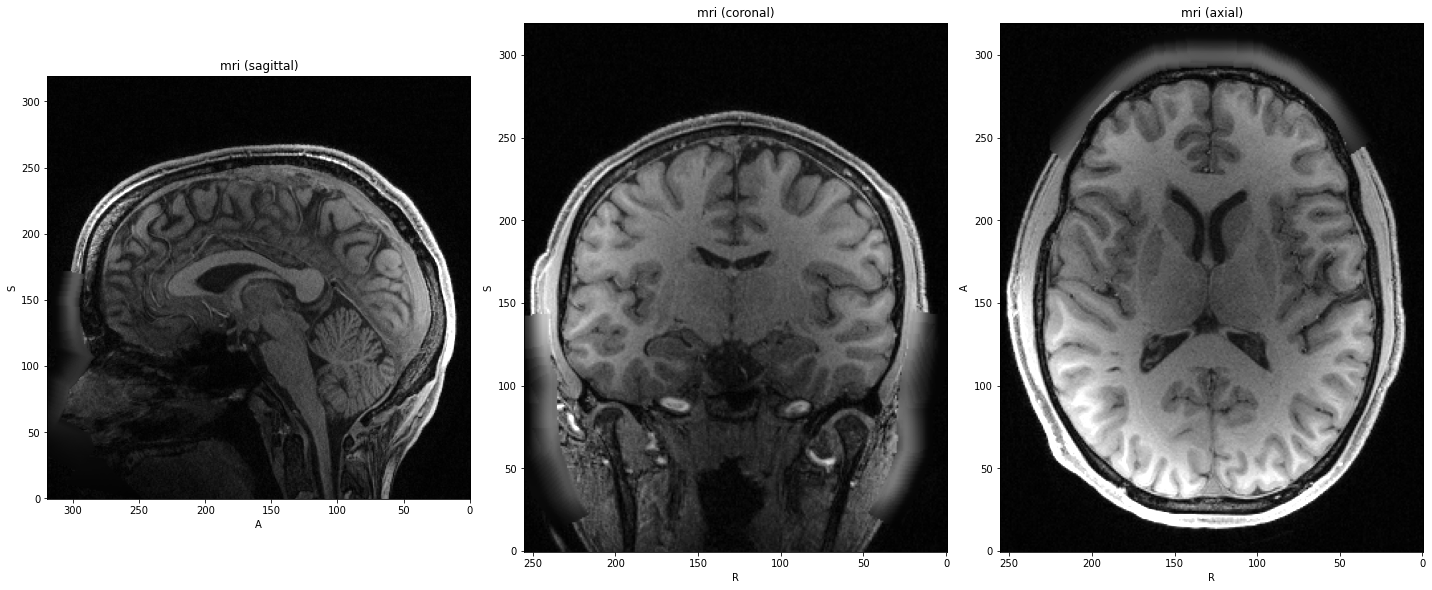

In [11]:
a_subject_normalized = transform(a_subject)
print(a_subject_normalized)
print(a_subject_normalized.mri)
a_subject_normalized.plot()

  0%|          | 0/100 [00:00<?, ?it/s]

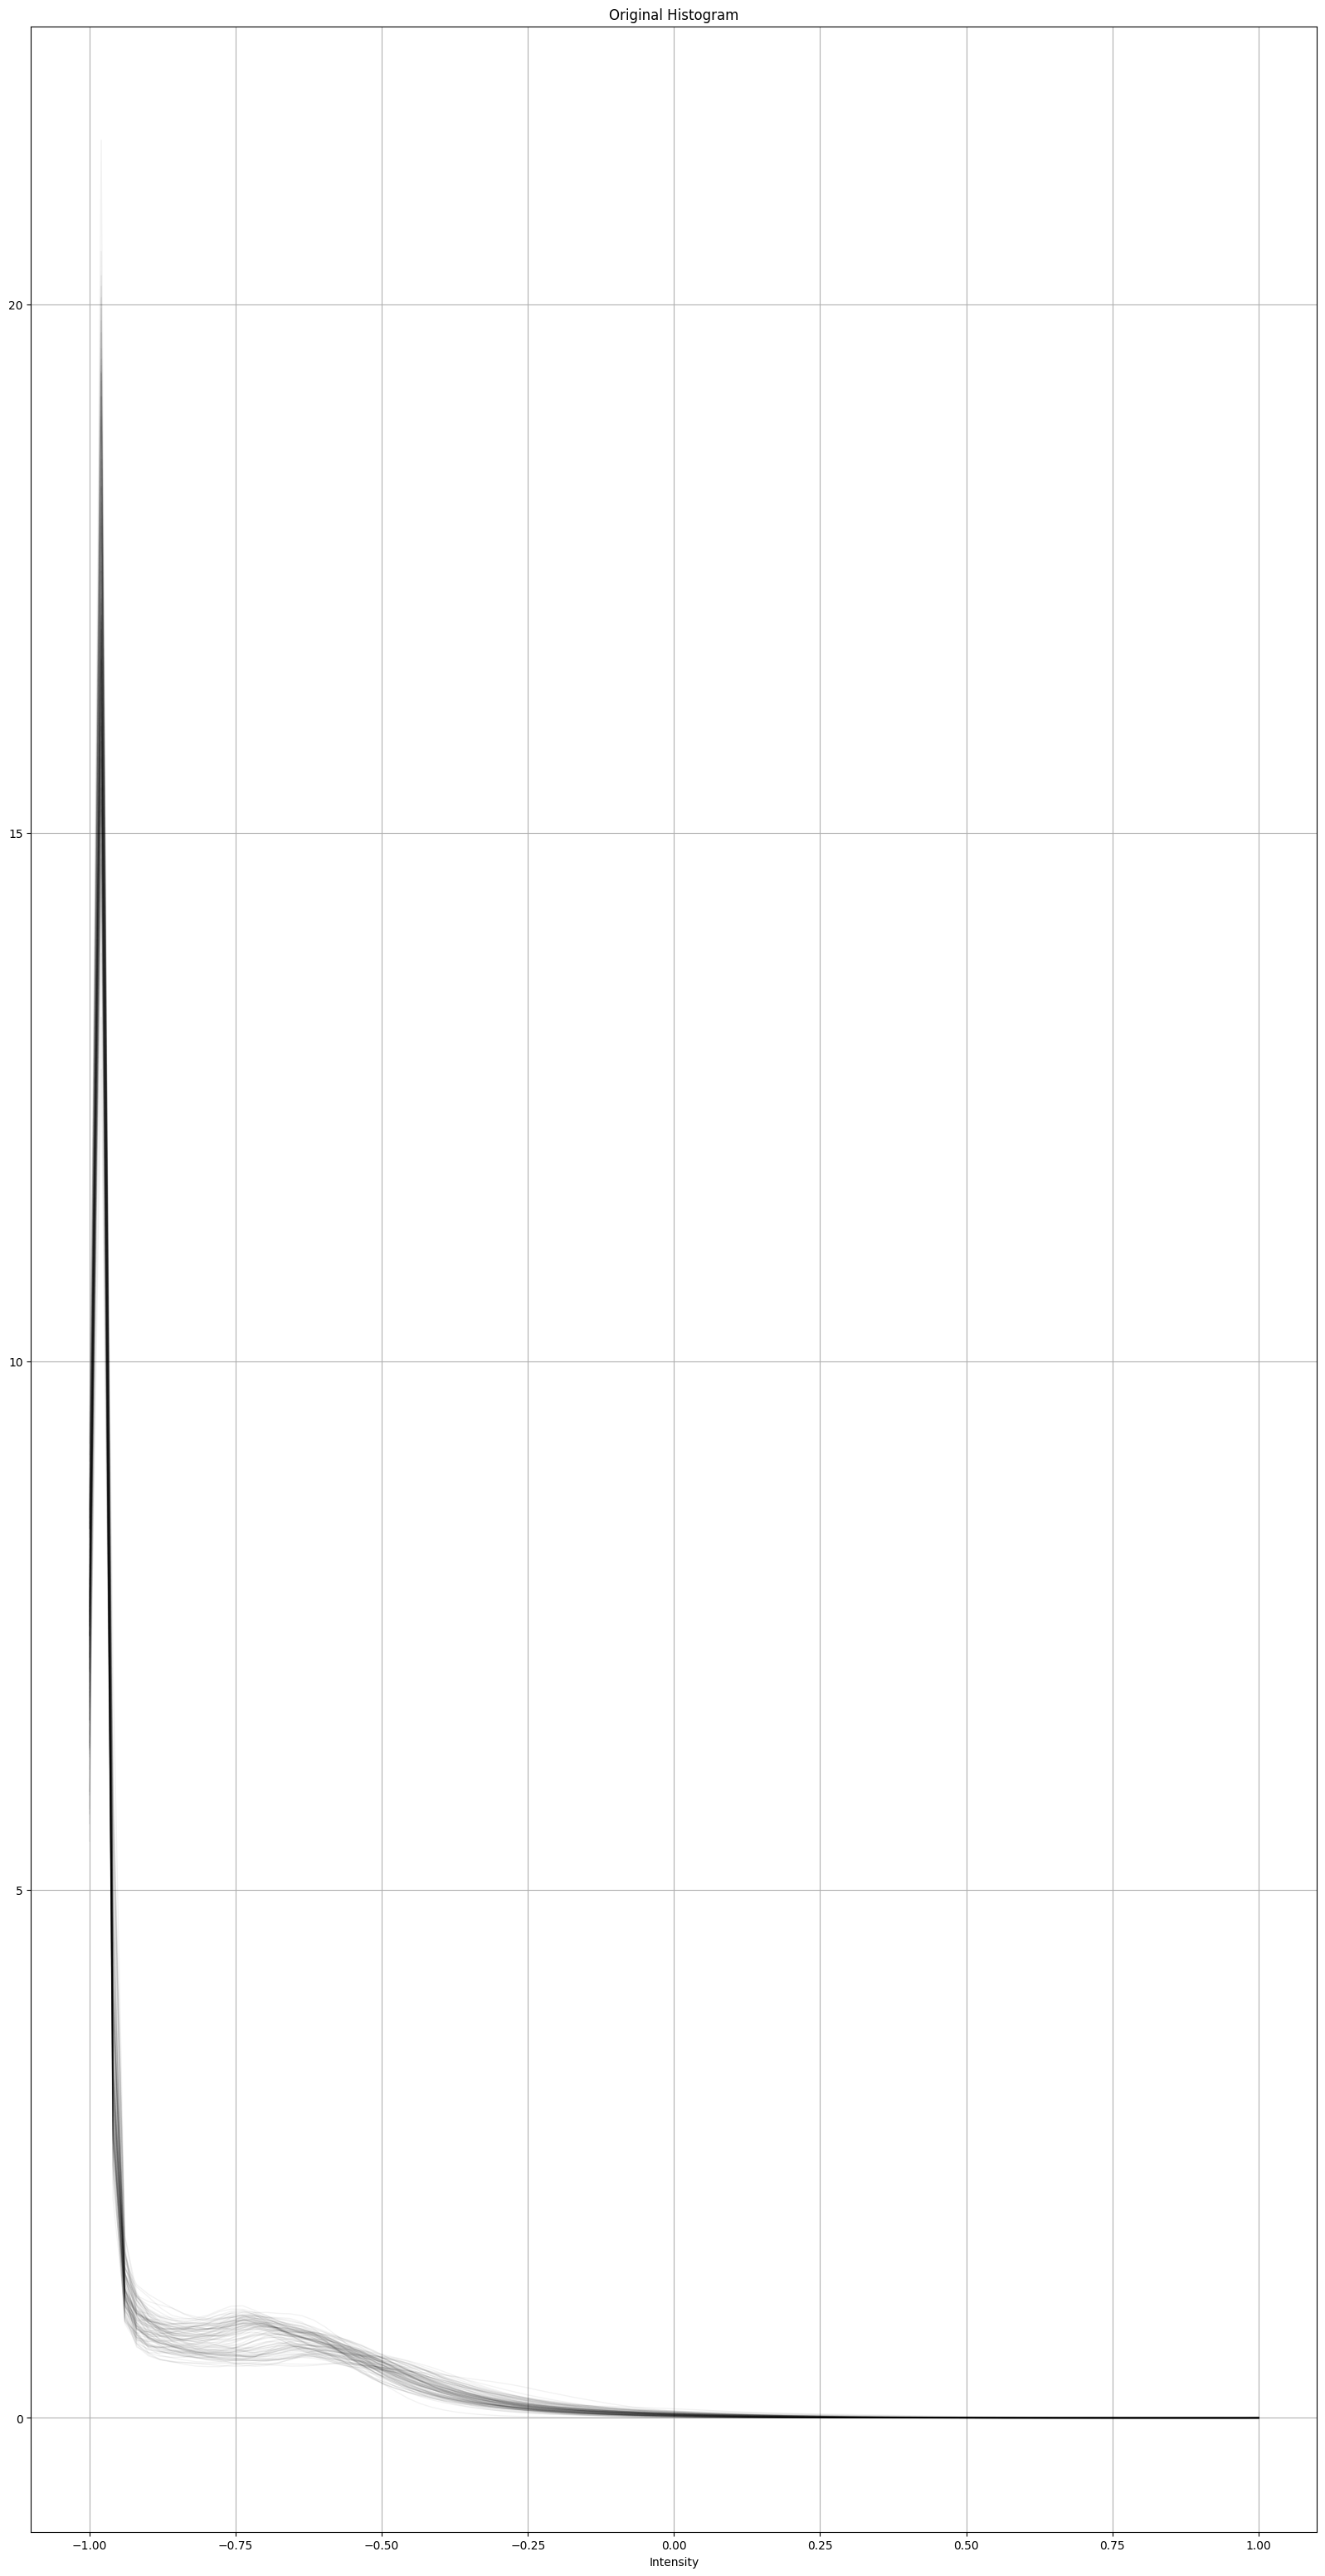

In [12]:
original_hist_axis = compute_histogram(dataset=val_subset, title='Original Histogram')

  0%|          | 0/100 [00:00<?, ?it/s]

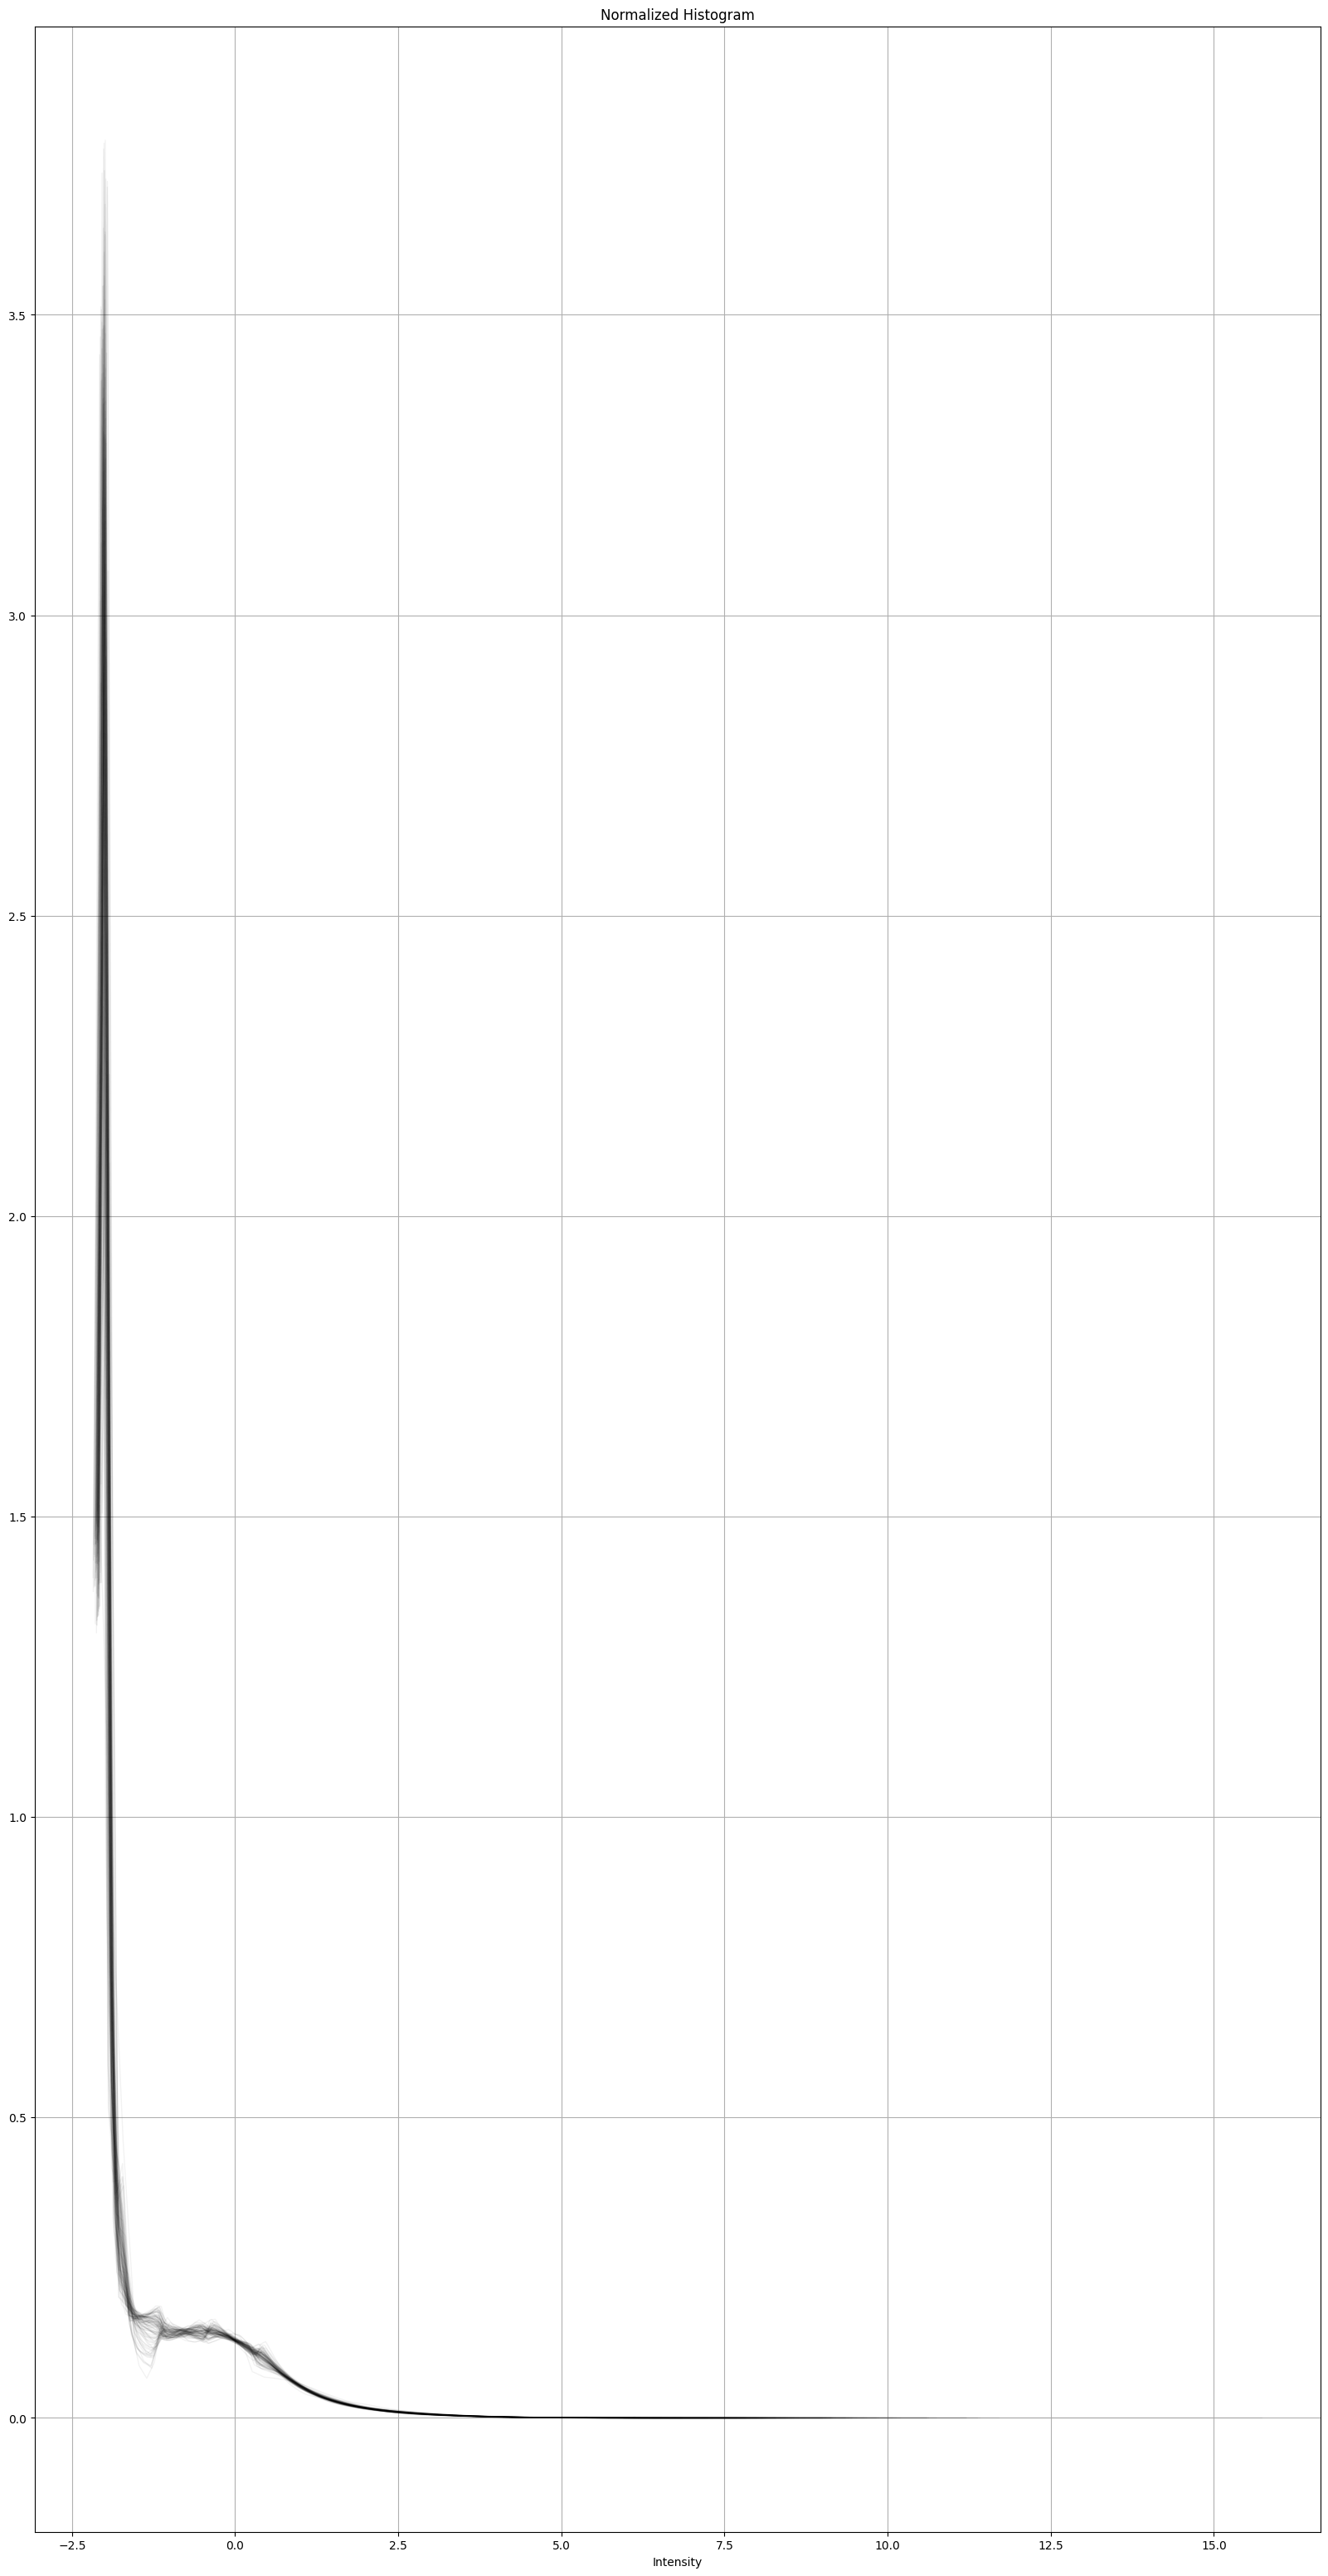

In [13]:
transformed_hist_axis = compute_histogram(dataset=val_subset, transform=transform, title='Normalized Histogram')